In [13]:
# Import Libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output
from testings import *
from helpers import *
%matplotlib inline

# Simple Harmonic Motion
Simple Harmonic Motion is one of the most common physical relations, appearing in every sub-field of physics: Mechanics, Electromagnetism, Quantum mechanics, etc. The goal of this exercise is to simulate physical systems that undergo simple harmonic motion, and give ourselves a clear visualization of how such systems behave over time. 

## Mass on a Spring
A mass-spring system is the first simple harmonic oscillator introduced in most introductory mechanics courses, where a spring attached to the wall is connected to a mass. 

https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/2952/2018/01/31200835/CNX_UPhysics_15_01_MassSpring.jpg

Such a simple harmonic oscillator has a closed-form solution, meaning we can write an equation of the position as a function of time. Complete the closed-form solution in the function below. 
\
\
*Hint: Feel free to look up the solution on the internet! In fact, it is a common practice, and encouraged, to look up functions and ideas when people write computer programs!*

In [14]:
def shm_position(t, A, k, m, phi):
    """
    Returns the position of a mass-spring simple harmonic oscillator at a given time. 
    
    Parameters:
    t: Time
    A: Amplitude
    k: Spring constant
    m: Mass
    phi: Initial phase shift
    
    Output: x
    x: Position of the oscillator
    """
    # Question 1
    w = np.sqrt(k / m)
    return A * np.sin(w * t + phi)

Run the next cell to test your code! 

In [15]:
# Test for Question 1
# Just run it!
test1(shm_position)

Correct!
Well done!


With a function x(t) that describes the position of the harmonic oscillator over time, we can simulate the dynamics of a natural spring-mass system. Suppose the system has the following parameters: \
Spring Constant: 10 N/m \
Mass: 1.5 kg \
Amplitude: 1 m \
Initial Phase Shift: $\pi/2$ radians \
Time: 10000 entries equally spaced from 0 to 20 seconds

In [16]:
# Question 2
t1 = np.linspace(0, 20, 10000)
x1 = shm_position(t1, 1, 10, 1.5, np.pi/2)

In [17]:
# Test for Question 2
test2(t1, x1)

Correct!
Well done!


Now let's plot our data! \
Plot a position versus time graph in the next cell. 

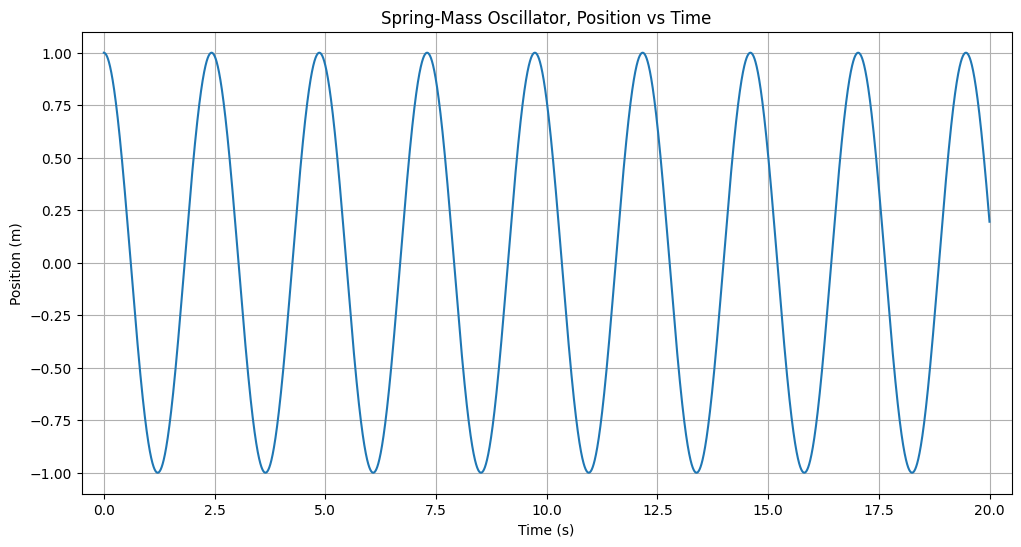

In [44]:
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Spring-Mass Oscillator, Position vs Time")
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")

ax.grid(True)

# Question 3
ax.plot(t1, x1, color="tab:blue")

plt.show()

Thanks to the computational capabilities of Python, we can also generate a real-time version of the graph above. \
Run the following cell to view a real-time evolution of the spring-mass oscillator. 

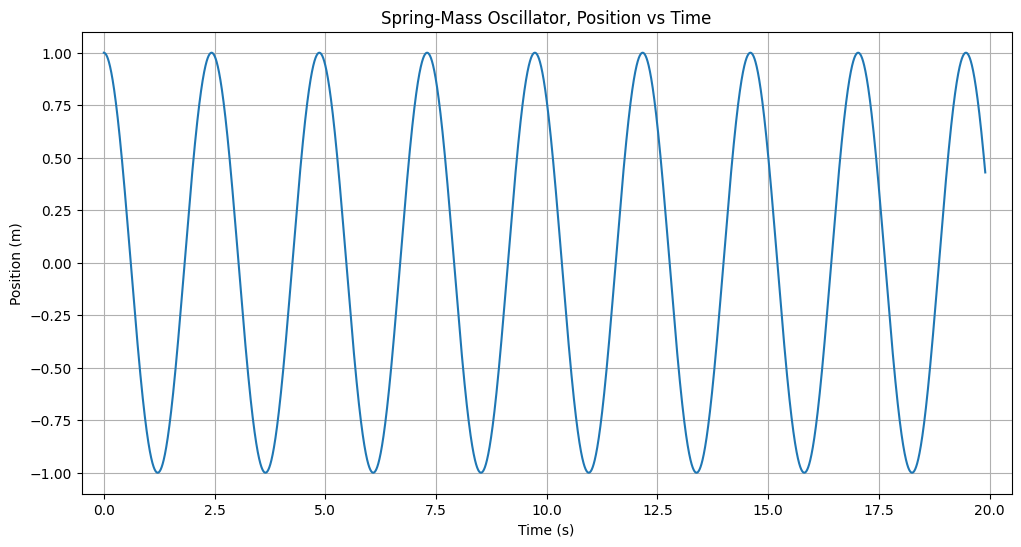

In [45]:
def live_plot(data):
    clear_output(wait=True)
    fig = plt.figure()
    fig.set_size_inches(12, 6)
    
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title("Spring-Mass Oscillator, Position vs Time")
    ax.set_xlim(-0.5, 20.5)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Position (m)")
    
    ax.grid(True)

    ax.plot(data[0], data[1], color="tab:blue")
    plt.show()

data = [[], []]
for i in np.arange(len(t1) // 32):
    data[0].extend(t1[i * 32 - 32:i * 32])
    data[1].extend(x1[i * 32 - 32:i * 32])
    live_plot(data)

## Linear Approximation 
### You may skip this section go directly to "Numerical Integration" if you have studied Calculus AB/BC and familiar with the technique of rectangular integration. 
This section explains the relevant mathematical background used in the next section for those unfamiliar with this calculus technique. 

Imagine that we are given some velocity versus time graph (and we know the function that describes the curve), but neither the velocity or the acceleration is constant. 

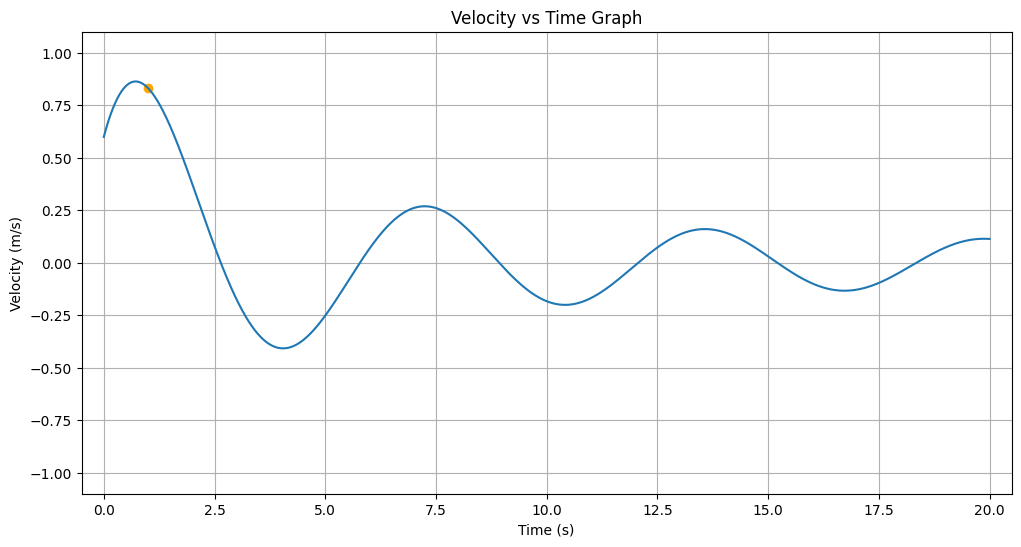

In [104]:
# Some ugly v-t graph
t_example1 = np.linspace(0, 20, 10000)
f = lambda x: 2.5 * np.sin(x + 0.5) / (x + 2)
v_example1 = f(t_example)

fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Velocity vs Time Graph")
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.grid(True)

ax.plot(t_example1, v_example1, color="tab:blue")
ax.scatter(1, f(1), color="orange")

plt.show()

This means if we want to know the position of the object, we unfortunately cannot apply the kinematics equation
$$ x_f = x_0 + v_0 t + \frac{1}{2}at^2 $$
In this scenario. But before we admit it is an impossible endeavor, let us zoom in and look at a particular section of the graph. Consider the interval around $t = 1$ (the orange dot in the graph above). In the figure below, I'm going to plot the v-t graph within the interval $0.9 \leq t \leq 1.1$. 

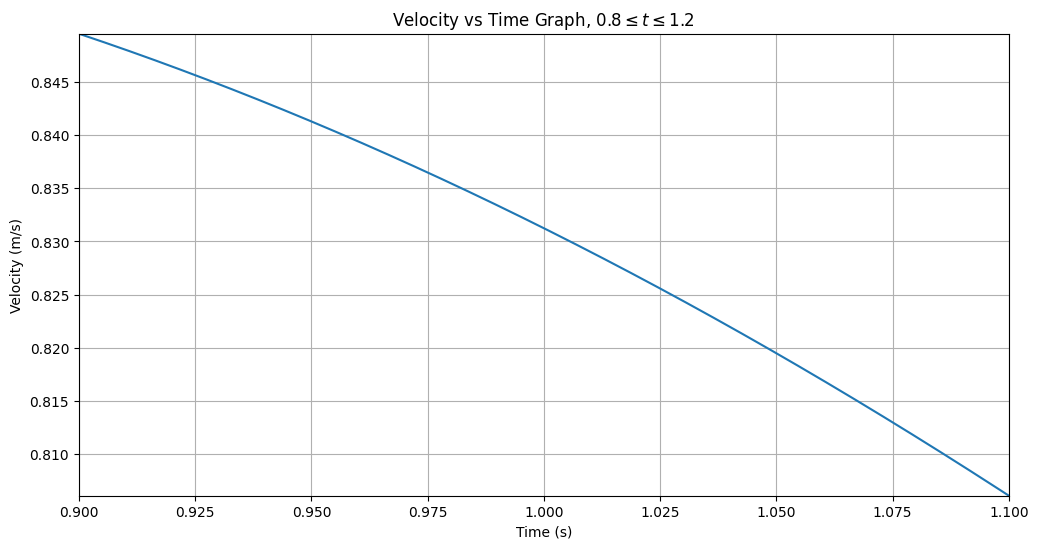

In [138]:
# The same v-t graph, zoomed in around t = 1
t_example2 = np.linspace(0.9, 1.1, 10000)
v_example2 = f(t_example2)

fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

ax.set_title(r"Velocity vs Time Graph, $0.8 \leq t \leq 1.2$")
x_limit = np.array([0.9, 1.1])
ax.set_xlim(x_limit)
ax.set_ylim(f(x_limit)[::-1])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.grid(True)

ax.plot(t_example2, v_example2, color="tab:blue")

plt.show()

Zoom in even more, and look at the interval $0.99 \leq t \leq 1.01$...

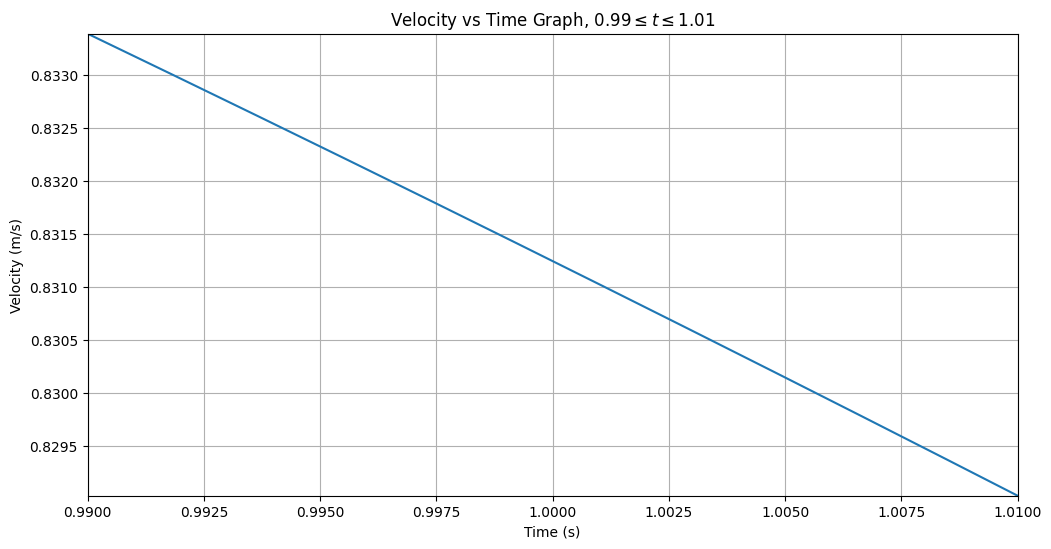

In [142]:
# The same v-t graph, zoomed in around t = 1
t_example3 = np.linspace(0.99, 1.01, 10000)
v_example3 = f(t_example3)

fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

ax.set_title(r"Velocity vs Time Graph, $0.99 \leq t \leq 1.01$")
x_limit = np.array([0.99, 1.01])
ax.set_xlim(x_limit)
ax.set_ylim(f(x_limit)[::-1])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.grid(True)

ax.plot(t_example3, v_example3, color="tab:blue")

plt.show()

You might have noticed the graph above looks suspiciously close to a straight line, so let's actually plot a straight line on top of it, and see how they match. 

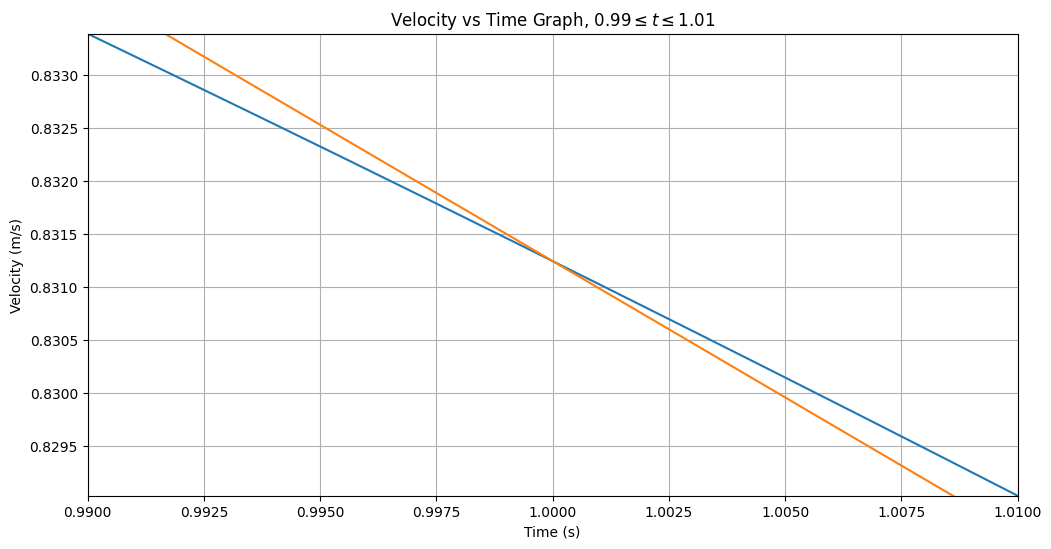

In [143]:
# The same v-t graph, zoomed in around t = 1
t_example3 = np.linspace(0.99, 1.01, 10000)
v_example3 = f(t_example3)
g = lambda x: (2.5 * np.cos(x + 0.5) - 2.5 * np.sin(x + 0.5)) / (x + 2)**2
line_example3 = f(1) + g(1) * (t_example3 - 1)

fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

ax.set_title(r"Velocity vs Time Graph, $0.99 \leq t \leq 1.01$")
x_limit = np.array([0.99, 1.01])
ax.set_xlim(x_limit)
ax.set_ylim(f(x_limit)[::-1])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.grid(True)

ax.plot(t_example3, v_example3, color="tab:blue")
ax.plot(t_example3, line_example3, color="tab:orange")

plt.show()

We have a bad news: there are still some discrepancies between the original graph and the straight line. <br>
But despair not. Look at how the scale of the axes--the error of approximating the original function using a straight line is within 4 figures after the decimal point, or, we are off by only ~$1mm/s$ when the velocity is on the scale of ~$1m/s$, an error small enough to ignore. <br>
Therefore, at every point in time, if we only focus on the motion within a very short time interval (say, within $0.001s$), we can approximate any motion as one with a constant acceleration (with a linear v-t graph and constant a-t graph), and arrive at a result with negligible error. This motivates physicists to model and study dynamical systems that cannot be solved by conventional mathematical means, which

## Numerical Integration
Almost all the equations in physics do not go beyond the second derivative ([Why?](https://physics.stackexchange.com/questions/685650/why-do-so-many-laws-in-physics-operate-on-the-second-derivative)). \
So if we have an equation describing a physical system, for example, $F = ma = m \frac{d^2x}{dt^2}$; \
And we are given an initial condition $x_o$, $v_o$; \
We can write a Python program that calculates the evolution of our system numerically, similar to the [Rectangular Integration](https://math.libretexts.org/Bookshelves/Calculus/Map%3A_Calculus__Early_Transcendentals_(Stewart)/05%3A_Integrals/5.01%3A_Areas_and_Distances#:~:text=We%20can%20use%20this%20regular%20partition%20as%20the%20basis%20of%20a%20method%20for%20estimating%20the%20area%20under%20the%20curve.%20We%20next%20examine%20two%20methods%3A%20the%20left%2Dendpoint%20approximation%20and%20the%20right%2Dendpoint%20approximation.) method you may have encountered in Calculus. Which is: \
$$a_o = \frac{F_o}{m}$$
$$v_f = v_o + a_o \ dt$$
$$x_f = x_o + v_o \ dt$$
http://spiff.rit.edu/classes/phys317/lectures/num_integ_c.gif \
We shall model the same spring-mass system with the numerical integration method, and compare the results of the two different methods. \
In the next cell, write a function that takes in the initial position $x_o$ and velocity $v_o$, and an infinitesimal time $dt$, along with the other parameters of the spring, and return the final position and velocity after the time $dt$ has passed. 

In [88]:
def oscillator(k, m, x0, v0, dt):
    """
    Returns the position of a mass-spring simple harmonic oscillator at the next timestamp. 
    
    Parameters:
    k: Spring constant
    m: Mass
    x0: Initial position
    v0: Initial velocity
    dt: Infinitesimal time
    
    Output: (xf, vf)
    xf: Position of the oscillator after time dt
    vf: Velocity of the oscillator after time dt
    """
    # Question 4
    a0 = - k * x0 / m
    vf = v0 + a0 * dt
    xf = x0 + v0 * dt
    return xf, vf

In [89]:
# Test for Question 4
test4(oscillator)

Correct!
Well done!


In the previous section, we have modeled a spring-mass system initial placed at 1m and is at rest when $t$=0. Use $dt$ = 0.002s, model the same system with the numerical integration method for 10000 timestamps. \
The spring parameters from the previous section are: \
Spring Constant: 10 N/m \
Mass: 1.5 kg

In [90]:
# Question 5
x2 = np.array([1])
v2 = np.array([0])
t2 = np.array([0])

for i in np.arange(10000):
    x0 = x2[-1]
    v0 = v2[-1]
    t0 = t2[-1]
    dt = 0.002
    
    xf, vf = oscillator(10, 1.5, x0, v0, dt)
    tf = t0 + dt
    
    x2 = np.append(x2, xf)
    v2 = np.append(v2, vf)
    t2 = np.append(t2, tf)

In [91]:
# Test for Question 5
test5(x2, v2, t2)

Correct!
Well done!


Generate a plot the results of our numerical integration. 

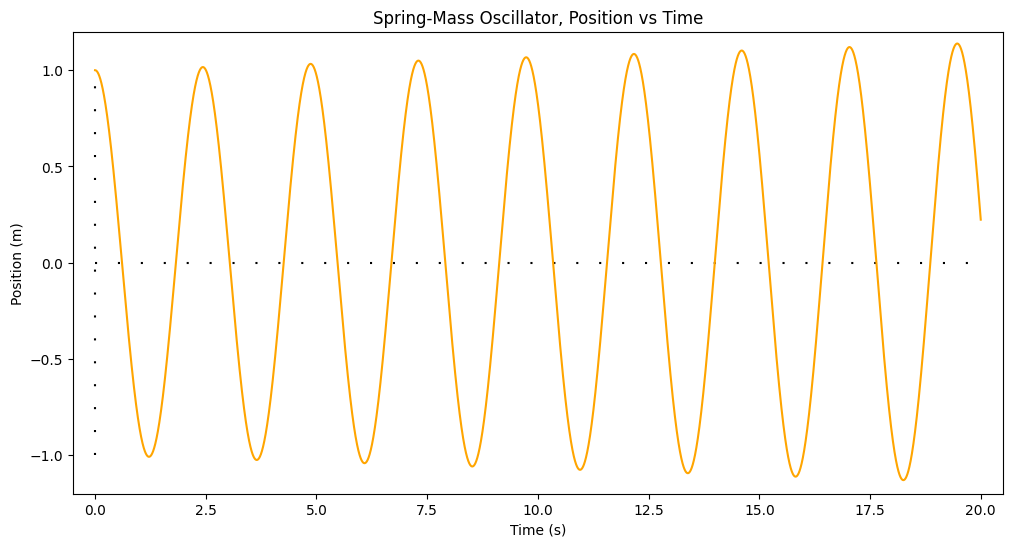

In [98]:
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Spring-Mass Oscillator, Position vs Time")
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")

ax.vlines(x=0, ymin=-1, ymax=1, color='black', linestyle=(0, (1, 10)))
ax.hlines(y=0, xmin=0, xmax=20, color='black', linestyle=(0, (1, 10)))

# Question 6
ax.plot(t2, x2, color="orange")

plt.show()

If we graph the results of closed-form solution and the numerical integration on the same graph, we can indeed see some inconsistencies. Just like treating an integral as a finite sum, we will sacrafice some accuracy by modeling a physical system with numerical integration. We can limit these inconsistencies by using a smaller $dt$ value, though at the cost of computation speed. \
Still, the method of numerical integration is particularly useful, especially for some complicated relations that cannot be modeled with a closed-form solution. 

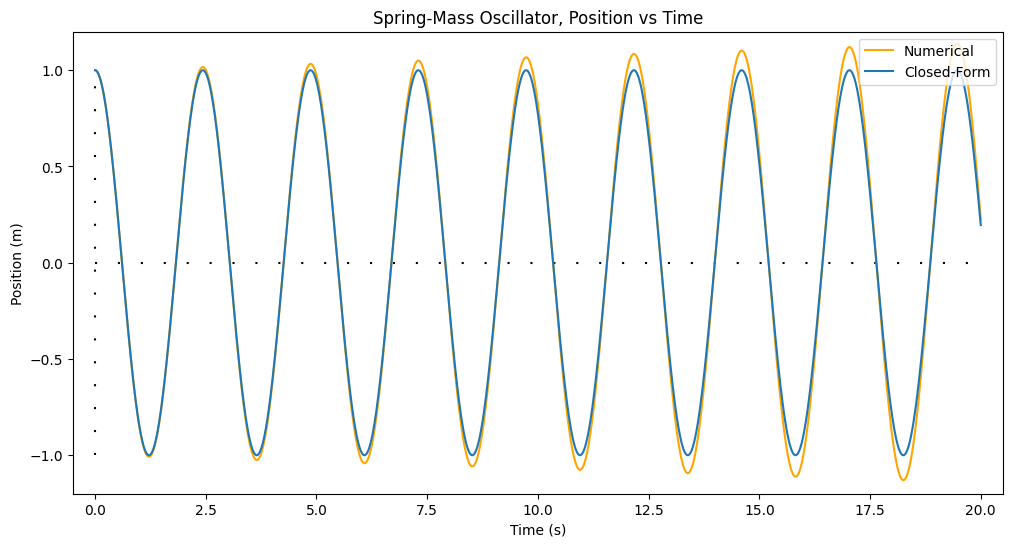

In [102]:
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Spring-Mass Oscillator, Position vs Time")
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")

ax.vlines(x=0, ymin=-1, ymax=1, color='black', linestyle=(0, (1, 10)))
ax.hlines(y=0, xmin=0, xmax=20, color='black', linestyle=(0, (1, 10)))

ax.plot(t2, x2, color="orange", label="Numerical")
ax.plot(t1, x1, color="tab:blue", label="Closed-Form")

ax.legend(loc="upper right")
plt.show()